### Dataset Description

> I will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

In [52]:
candy_df=pd.read_excel('candyhierarchy2017.xlsx')

C:\Users\INTEL\venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [53]:
# Exploring the shape of the data frame
candy_df.shape


(2460, 120)

Let's start our data exploration by printing first 5 rows.

In [54]:
candy_df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

In [55]:
pd.set_option('display.max_columns', None)
display(candy_df.dtypes[[*range(7),*range(-11,-1)]])


Internal ID                           int64
Q1: GOING OUT?                       object
Q2: GENDER                           object
Q3: AGE                              object
Q4: COUNTRY                          object
Q5: STATE, PROVINCE, COUNTY, ETC     object
Q6 | 100 Grand Bar                   object
Q7: JOY OTHER                        object
Q8: DESPAIR OTHER                    object
Q9: OTHER COMMENTS                   object
Q10: DRESS                           object
Unnamed: 113                         object
Q11: DAY                             object
Q12: MEDIA [Daily Dish]             float64
Q12: MEDIA [Science]                float64
Q12: MEDIA [ESPN]                   float64
Q12: MEDIA [Yahoo]                  float64
dtype: object

In [56]:
candy_df.isna().sum().iloc[[*range(7),*range(-11,-1)]] /candy_df.shape[0] *100

Internal ID                          0.000000
Q1: GOING OUT?                       4.471545
Q2: GENDER                           1.666667
Q3: AGE                              3.414634
Q4: COUNTRY                          2.601626
Q5: STATE, PROVINCE, COUNTY, ETC     4.065041
Q6 | 100 Grand Bar                  30.365854
Q7: JOY OTHER                       62.967480
Q8: DESPAIR OTHER                   70.853659
Q9: OTHER COMMENTS                  84.308943
Q10: DRESS                          30.243902
Unnamed: 113                        99.634146
Q11: DAY                            29.471545
Q12: MEDIA [Daily Dish]             96.544715
Q12: MEDIA [Science]                44.634146
Q12: MEDIA [ESPN]                   95.975610
Q12: MEDIA [Yahoo]                  97.276423
dtype: float64

# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....
### From the above exploration, we can note that:
* The candy data set consists of 2460 rows and 120 columns
* Some of the columns are not related to our exploration (Other Comments, Dress, Day, Media) and some others have no meaning(Click Coordinates(x,y).
* Some columns are almost empty like: (Click Coordinates(x,y),Q9: OTHER COMMENTS, Unnamed: 113, Q12: MEDIA [Yahoo] , Q12: MEDIA [ESPN]  ..


# Cleaning
### Drop all the useless columns and  rows with too much NaN
From the above, we can figure out that some columns are beyond our concern (Other Comments, Dress, Day, Media) and some others have no meaning (Click Coordinates(x,y). So they can be safely deleted.

In [57]:
columns_to_delete = ['Internal ID','Q9: OTHER COMMENTS','Unnamed: 113','Q12: MEDIA [Yahoo]','Click Coordinates (x, y)','Q8: DESPAIR OTHER','Q7: JOY OTHER']
candy_df.drop(columns_to_delete, axis=1, inplace=True)
candy_df.head()

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q10: DRESS,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Renaming the columns

In [58]:
mapping={'Q1: GOING OUT?':'Going Out?','Q2: GENDER':'Gender','Q3: AGE':'Age','Q4: COUNTRY':'Country'
    ,'Q5: STATE, PROVINCE, COUNTY, ETC':'Location','Q11: DAY':'Day','Q10: DRESS':'Dress','Q12: MEDIA [Daily Dish]':'DailyDish','Q12: MEDIA [Science]':'Science'
         ,'Q12: MEDIA [ESPN]':'ESPN'}
candy_df.rename(columns=mapping,inplace=True)
candy_df.columns=candy_df.columns.str.replace("Q6 | ",'')
candy_df.head()

,Going Out?,Gender,Age,Country,Location,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,DailyDish,Science,ESPN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESP

### Clean `going out` column
 Null values in 'going out' column can be replaced with 'unknown'

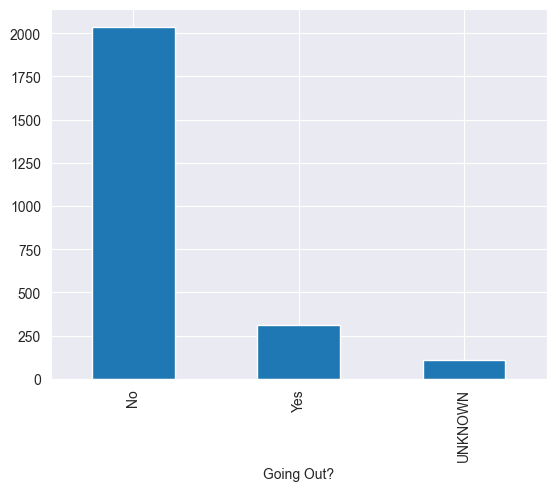

In [59]:
candy_df['Going Out?'].fillna('UNKNOWN',inplace=True)
assert candy_df['Going Out?'].isna().sum() == 0 ,'Null value is not filled properly'
going_out_counts=candy_df['Going Out?'].value_counts()
going_out_counts.plot(kind='bar')
plt.show()

### clean ` gender` column
 Null values in 'gender' column can be replaced with 'unknown'

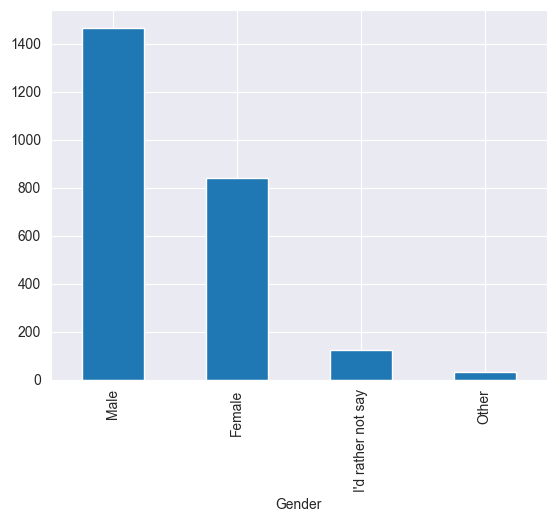

In [60]:
candy_df['Gender'].fillna("I'd rather not say",inplace=True)
assert candy_df['Gender'].isna().sum() == 0 ,'Null value is not filled properly'
gender_counts=candy_df['Gender'].value_counts()
gender_counts.plot(kind='bar')
plt.show()

### Clean ` age` column
 We can see that some values can't be converted to integer, so we have to convert it first to null.

In [61]:
# candy_df['Age']=candy_df['Age'].apply(lambda s: int(s) if str(s).isdigit() and int(s) >= 0 else np.NaN )
# mean_age=int(candy_df[~candy_df['Age'].isna()]['Age'].astype('int').mean())
# candy_df['Age'].fillna(mean_age,inplace=True)
# candy_df['Age'].unique()
# candy_df['Age']=candy_df['Age'].astype('int')
# OR:
candy_df['Age']=pd.to_numeric(candy_df['Age'],errors='coerce')
mean_age=int(candy_df[~candy_df['Age'].isna()]['Age'].astype('int').mean())
candy_df['Age'].fillna(mean_age,inplace=True)
candy_df['Age'].unique()

array([  42. ,   44. ,   49. ,   40. ,   23. ,   53. ,   33. ,   43. ,
         56. ,   64. ,   37. ,   59. ,   48. ,   54. ,   36. ,   45. ,
         25. ,   34. ,   35. ,   38. ,   58. ,   50. ,   47. ,   16. ,
         52. ,   63. ,   65. ,   41. ,   27. ,   31. ,   61. ,   46. ,
         62. ,   29. ,   39. ,   32. ,   28. ,   69. ,   67. ,   30. ,
         22. ,   26. ,   51. ,   70. ,   24. ,   18. ,   19. ,   57. ,
         60. ,   66. ,   12. ,   55. ,   72. ,   21. ,   11. ,    9. ,
         68. ,   20. ,    6. ,   10. ,   71. ,   90. ,   13. ,  312. ,
         99. ,    7. ,   88. ,   39.4,   74. ,  102. ,   17. ,   15. ,
          8. ,   75. ,   14. ,  100. ,   76. , 1000. ,   77. ,   73. ,
         70.5,    1. ,    4. ])

In [62]:
candy_df.Age.describe()

count    2460.000000
mean       42.590203
std        23.317321
min         1.000000
25%        34.000000
50%        42.000000
75%        49.000000
max      1000.000000
Name: Age, dtype: float64

We can see that some outliers are present in Age column. Applying range constraint, assuming minmum age= 5 years old, and maximum Age= 60.

In [63]:
candy_df.loc[candy_df['Age']>60,['Age']]=60
candy_df.loc[candy_df['Age']<5,['Age']]=5

### Clean ` country` column
Solving inconsistency in the data.

In [64]:
candy_df.Country.fillna('unknown',inplace=True)
candy_df.Country=candy_df.Country.str.lower()
candy_df.Country=candy_df.Country.str.strip()
candy_df.Country.unique()


array(['unknown', 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america', nan,
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south korea', 'n

In [65]:
countries=['usa', 'united states of america','america','united kingdom england', 'hong kong', 'china', 'sweden', 'spain',
                       'ireland', 'taiwan', 'singapore', 'netherlands',
                       'indonesia', 'south korea', 'switzerland', 'denmark', 'scotland', 'canada', 'iceland', 'south africa',
                       'japan', 'greece', 'costa rica', 'germany', 'finland', 'france', 'mexico']
from fuzzywuzzy import process

for country in countries:
    matches=process.extract(country,candy_df.Country,limit=candy_df.shape[0])
    for match in matches:
        if match[1]>=80 :
            candy_df.loc[candy_df.Country==match[0],['Country']]=country
candy_df.Country.unique()

array(['unknown', 'usa', 'canada', 'murica', 'america', 'uk', 'uae',
       'united kingdom england', 'mexico', 'u.s.a.', nan, 'france',
       'finland', 'north carolina', 'netherlands', 'germany', 'europe',
       'earth', 'u.k.', 'costa rica', 'cascadia', 'australia',
       'insanity lately', 'greece', 'usa? hard to tell anymore..',
       'pittsburgh', 'canae', 'new york', 'trumpistan', 'iceland',
       'south korea', 'california', 'japan', 'south africa', 'scotland',
       'denmark', 'switzerland', 'ud', 'new jersey', 'indonesia',
       'endland', 'atlantis', 'murrika', 'alaska', 'soviet canuckistan',
       'singapore', 'china', 'taiwan', 'hong kong', 'spain', 'sweden',
       'narnia', 'u s a', 'subscribe to dm4uz3 on youtube',
       "i don't know anymore", 'fear and loathing'], dtype=object)

In [66]:
mappings={'murica':'usa','uae':'usa','united kingdom england':'uk','u.s.a':'usa','u.k':'uk','usa? hard to tell anymore..':'usa'
          ,'canae':'canada','california':'usa','ud':'uk','endland':'uk','new jersey':'usa','soviet canuckistan':'russia','u s a':'usa',
          'subscribe to dm4uz3 on youtube':'unknown','us':'usa','united states':'usa','unted kingdom':'uk','united staes':'usa',"i don't know anymore":'unknown','fear and loathing':'unknown','insanity lately':'unknown'
         , 'america':'usa','u.s.a.':'usa','u.k.':'uk','alaska':'usa','new york':'usa'}
candy_df['Country']=candy_df['Country'].replace(mappings)
candy_df.Country.unique()

array(['unknown', 'usa', 'canada', 'uk', 'mexico', nan, 'france',
       'finland', 'north carolina', 'netherlands', 'germany', 'europe',
       'earth', 'costa rica', 'cascadia', 'australia', 'greece',
       'pittsburgh', 'trumpistan', 'iceland', 'south korea', 'japan',
       'south africa', 'scotland', 'denmark', 'switzerland', 'indonesia',
       'atlantis', 'murrika', 'russia', 'singapore', 'china', 'taiwan',
       'hong kong', 'spain', 'sweden', 'narnia'], dtype=object)

In [67]:
candy_df.fillna({'Country':'Unknown'},inplace=True)

### Clean 'Location' column

In [68]:
candy_df.Location.unique()

array([nan, 'NM', 'Virginia', 'or', 'exton pa', 'Colorado ', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Colorado', 'Los Angeles, California', 'CA',
       'New York ', 'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota ',
       'London', 'mn', 'TEXAS', 'Illinois', 'District of Columbia',
       'Washington', 'Massachusetts ', 'OR', 'Montana', 'New York',
       'massachusetts', 'Abu Dhabi', 'TX', 'Arizona', 'Dc', 'yukon',
       'Pennsylvania ', 'MD', 'Ohio', 'Alberta ', 'OXFORDSHIRE', 'DC',
       'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'alaska',
       'Ny', 'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'CDMX', 'north carolina', 'Tennessee ', 'Texas ',
       'Knox cou

Location columns contains 470 diffrent values with lots of typos.
Importing valid locations from validStateNames.csv file generated by chatGpt.

In [69]:
import csv
locations = []
with open('validStateNames.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        location = row[0]
        locations.append(location)
print(locations)

['NM', 'Virginia', 'Exton', 'Colorado', 'Ontario', 'WA', 'Quebec', 'California', 'New York', 'CO', 'IN', 'MN', 'Aberdeenshire', 'Alberta', 'Wisconsin', 'RI', 'NC', 'Scotland', 'Michigan', 'Florida', 'New Jersey', 'VA', 'Los Angeles', 'IL', 'Texas', 'District of Columbia', 'Washington', 'Massachusetts', 'OR', 'Montana', 'Abu Dhabi', 'TX', 'Arizona', 'Yukon', 'Pennsylvania', 'MD', 'Ohio', 'Oxfordshire', 'Iowa', 'TN', 'BC', 'Nebraska', 'Utah', 'CDMX', 'Tennessee', 'Maine', 'Virginia', 'MO', 'Alaska', 'New Hampshire', 'Georgia', 'West Virginia', 'Oklahoma', 'South Carolina', 'Nevada', 'Greater London', 'North Dakota', 'Kansas', 'Missouri', 'Oxfordshire', 'Maine', 'British Columbia', 'USA', 'Kentucky', 'South Holland', 'Derbyshire', 'Hesse', 'Massachusetts', 'Alaska', 'New York', 'Pennsylvania', 'New Mexico', 'Oregon', 'Kentucky', 'Hawaii', 'Vermont', 'Arizona', 'North Carolina', 'Alabama', 'Florida', 'Manitoba', 'Colorado', 'California', 'South Carolina', 'Baja California', 'Louisiana', 'P

In [70]:
candy_df.fillna({'Location':'Unknown'},inplace=True)

In [71]:
for location in locations:
    matches = process.extract(location, candy_df.Location, limit=candy_df.shape[0])
    for match in matches:
        if match[1] >= 80:
            candy_df.loc[candy_df.Location == match[0], ['Location']] = location
candy_df.Location.unique()


array(['Unknown', 'NM', 'Wisconsin', 'Exton', 'Oxfordshire', 'Washington',
       'QuÃ©bec', 'NY', 'Texas', 'MN', 'Aberdeenshire', 'Alberta', 'NC',
       'Michigan', 'New York County', 'Pennsylvania', 'Chicago', 'Nj',
       'Greater London', 'District of Columbia', 'Massachusetts',
       'Vermont', 'Abu Dhabi', 'TX', 'Dc', 'Yukon', 'MD', 'Ohio', 'DC',
       'TN', 'BC', 'Maryland', 'Alaska', 'Ny', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska', 'Utah', 'ny', 'CDMX',
       'Tennessee', 'Philadelphia', 'PA', 'Oklahoma', 'Rhode Island',
       'VT, Chittenden', 'Alabama', 'FL, Orange County', 'Nope',
       'Manitoba', 'NJ', 'Arkansas', 'USA', 'Ky', 'South Holland',
       'Derbyshire', 'Hesse', 'vt', 'CA, Alameda', 'Newfoundland',
       'Idaho', 'Scotland', 'Az', 'VT', 'AZ', 'Sub Earth',
       'WV, Kanawha County ', 'Sussex', 48, 'San Jose', 'newfoundland',
       'mississippi', 'cascadia', 'Pa', 'Sydney ', 'Connecticut',
       'oblivion if things keep going this way',

### Clean ` Q6` columns
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [72]:
candy_df.iloc[:,5:-5]=candy_df.iloc[:,5:-5].fillna('Meh')
candy_df.iloc[:,5:-5].isna().sum().sum()

0

### Clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [73]:
candy_df['Dress'].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [74]:
candy_df['Dress']=candy_df['Dress'].fillna('other')

In [75]:
candy_df.isna().sum()

Going Out?       0
Gender           0
Age              0
Country          0
Location         0
              ... 
Dress            0
Day            725
DailyDish     2375
Science       1098
ESPN          2361
Length: 113, dtype: int64

In [76]:
candy_df.isna().sum()

Going Out?       0
Gender           0
Age              0
Country          0
Location         0
              ... 
Dress            0
Day            725
DailyDish     2375
Science       1098
ESPN          2361
Length: 113, dtype: int64

### Columns still have null values

In [77]:
columnsWithNull=[]
for column in candy_df.columns:
    if candy_df.loc[:,column].isna().sum()!=0:
        columnsWithNull.append(column)
print(columnsWithNull)

['Day', 'DailyDish', 'Science', 'ESPN']


### Cleaning  'Day' column

In [78]:
candy_df.Day.unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [80]:
candy_df.fillna({'Day':'Sunday'},inplace=True)

### Creating 'Media' column instead of DailyDish, Science and ESPN columns

array([nan,  1.])

In [93]:
candy_df.DailyDish.replace({1.0:'DailyDish'},inplace=True)
candy_df.Science.replace({1.0:'Science'},inplace=True)
candy_df.ESPN.replace({1.0:'ESPN'},inplace=True)
candy_df['Media']= candy_df['DailyDish'].fillna(candy_df['Science']).fillna(candy_df['ESPN'].fillna('Other'))
candy_df.Media.unique()


array(['Other', 'Science', 'DailyDish', 'ESPN'], dtype=object)

In [94]:
candy_df.drop(['DailyDish', 'Science', 'ESPN'], axis=1, inplace=True)

### Check for Data Validity Constrints
- No null values are farther presented.

In [100]:
assert candy_df.isna().sum().sum()==0

- Dropping duplicated rows

In [105]:
candy_df[candy_df.duplicated(keep=False)]

,Going Out?,Gender,Age,Country,Location,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Media
0,UNKNOWN,I'd rather not say,42.0,unknown,Unknown,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,other,Sunday,Other
24,No,Male,48.0,usa,NC,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,other,Sunday,Other
36,UNKNOWN,I'd rather not say,42.0,unknown,Unknown,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,other,Sunday,Other
67,No,Female,60.0,usa,MN,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,other,Sunday,Other
100,UNKNOWN,I'd rather not say,42.0,unknown,Unknown,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Meh,Me

In [106]:
candy_df.drop_duplicates(keep='first',inplace=True)

In [109]:
assert candy_df.duplicated().sum().sum()==0

In [111]:
candy_df.shape

(2325, 111)

### Conclusion for what we have done so far:
- there is no wrong data type
- there is no NaN values
- there is no farther duplicates
- all the column are cleaing and ready for the next step `EDA`